# 分类算法实现
Created by Vulcan626 on 2023/12/26

In [9]:
# 导入包
import pandas as pd

## 导入数据集
加载数据集

In [10]:
file_path = 'sms-spam-collection/SMSSpamCollection'
names = ['Label', 'SMS']
df = pd.read_csv(file_path, sep='\t', names=names)

# 查看数据集
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 特征提取

In [11]:
# 特征提取
from sklearn.feature_extraction.text import CountVectorizer

# 初始化计数向量器
vectorizer = CountVectorizer()

# 适配向量器并转换数据
X = vectorizer.fit_transform(df['SMS']).toarray()
y = df['Label']

## 分类算法实现
1. 朴素贝叶斯
2. 决策树
3. KNN

In [12]:
# 模型训练
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化分类器
nb_classifier = MultinomialNB()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()

# 训练分类器
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Decision Tree Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.93      0.86      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

KNN Classification Report:
               precision    recall  f1-score   support

         ham       0.92      1.00      0.96       966
        spam       1.00      0.44      0.61       149

    accuracy                           0.93      1115
   macro avg       0.96   

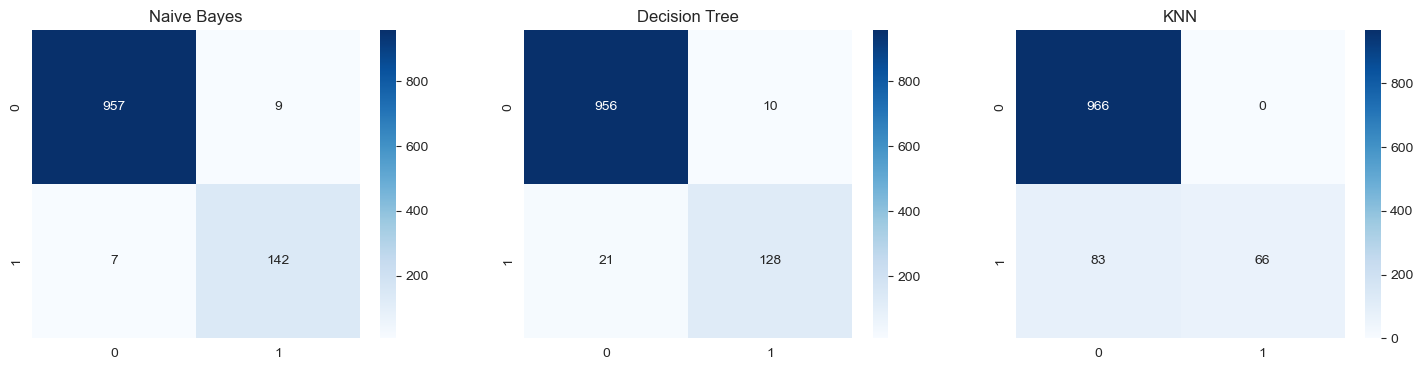

In [13]:
# 模型评估
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 对测试集数据进行类别预测
nb_predictions = nb_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# 生成分类报告
nb_report = classification_report(y_test, nb_predictions)
dt_report = classification_report(y_test, dt_predictions)
knn_report = classification_report(y_test, knn_predictions)

print('Naive Bayes Classification Report:\n', nb_report)
print('Decision Tree Classification Report:\n', dt_report)
print('KNN Classification Report:\n', knn_report)

# 生成混淆矩阵
nb_cm = confusion_matrix(y_test, nb_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)

# 绘制混淆矩阵
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues').set_title('Naive Bayes')
sns.heatmap(dt_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues').set_title('Decision Tree')
sns.heatmap(knn_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues').set_title('KNN')
plt.show()
